## Loading/Installing Packages

In [53]:
library(dplyr)
library(ggplot2)
require('zoo')

## Loading Data

In [54]:
df = read.csv('./data/draft70yr.txt', header=F)
colnames(df) <- c('Birthdate', 'Number', 'Month')

head(df)

Birthdate,Number,Month
1,305,1
2,159,1
3,251,1
4,215,1
5,101,1
6,224,1


## The Scatterplot of the Data

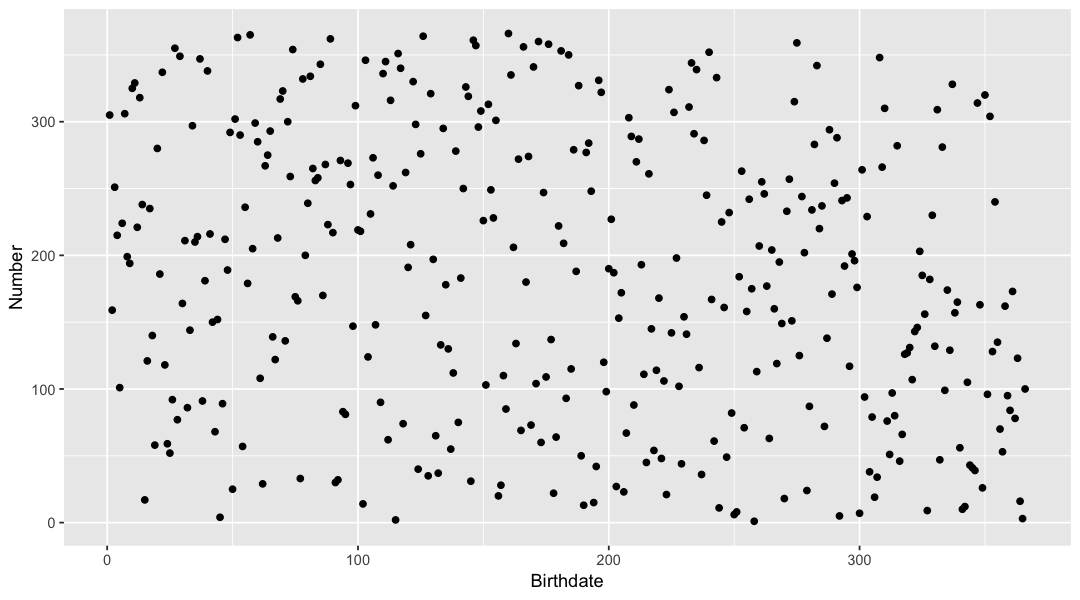

In [55]:
if (!exists('options_org')) options_org = options()

options(repr.plot.width=9, repr.plot.height=5)

ggplot() +
geom_point(aes(x=Birthdate, y=Number), data=df)

## The Scatterplot with Median Trace

Month,Birthdate_med,Num_med
1,16.0,211.0
2,46.0,210.0
3,76.0,256.0
4,106.5,225.0
5,137.0,226.0
6,167.5,207.5
7,198.0,188.0
8,229.0,145.0
9,259.5,168.0
10,290.0,201.0


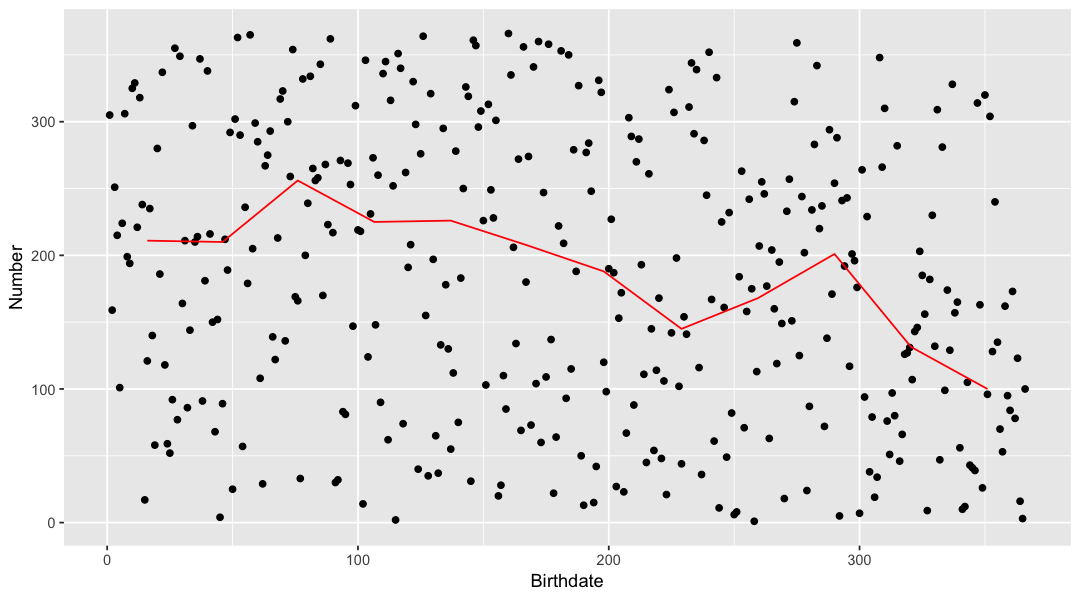

In [95]:
df_med = df %>% group_by(Month) %>%
    summarise(Birthdate_med=median(Birthdate), Num_med=median(Number))

df_med

ggplot() +
geom_point(aes(x=Birthdate, y=Number), data=df) +
geom_line(aes(x=Birthdate_med, y=Num_med), col='red', data=df_med)

## Scatterplot with Moving Averages

In [99]:
Num_mean = rollapply(df$Number, width = 30, FUN = mean, align = "center", partial = TRUE)

head(df_mean)

Birthdate,Num_mean
1,220.1875
2,221.0588
3,216.5556
4,208.2105
5,211.8000
6,210.5714


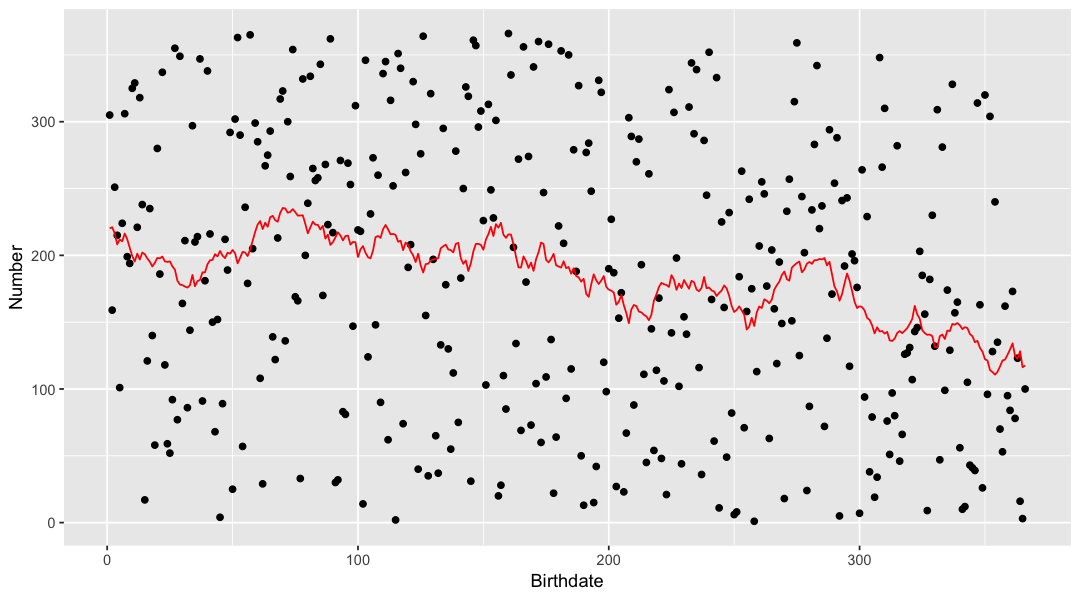

In [100]:
ggplot() +
geom_point(aes(x=Birthdate, y=Number), data=df) +
geom_line(aes(x=df$Birthdate, y=Num_mean), col='red')

## Concluding Remarks
The median trace and the moving avarage line both show an overall negative association between the birthdate and the assigned number.